## Notebook: Ptychography reconstruction with positions update from a CXI dataset
This notebook uses the the runner API (`pynx.ptycho.runner`) to load the data and prepare the optimisation.

This is what is used for the command-line scripts, here we just grap the Ptycho object from the runner.

This uses a dataset recorded on id01@ESRF, which exhibits some position distortions near the ceneter of the spiral scan.

In [1]:
# Select language and/or GPU name or rank through environment variable (optional)
#import os
#os.environ['PYNX_PU'] = 'cuda.0'  

%matplotlib notebook
import matplotlib.pyplot as plt
from pynx.ptycho import simulation, shape

# Import Ptycho, PtychoData and operators (automatically selecting OpenCL or CUDA)
from pynx.ptycho import *

# Import CXI runner
from pynx.ptycho.runner.cxi import PtychoRunnerScanCXI
from pynx.ptycho.runner.runner import params_generic as params

# This can be used to have a wide screen for the notebook
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))

## Load CXI data if necessary
this is available from the PyNX ESRF public folder

In [2]:
if not os.path.exists('ptycho-siemens-star-id01.cxi'):
    os.system('curl -O http://ftp.esrf.fr/pub/scisoft/PyNX/data/ptycho-siemens-star-id01.cxi')

## Load the data & setup the runner parameters
As we are using the `pynx.ptycho.runner` API, we can setup the parameters exactly as for the command-line scripts.

In [3]:
params['cxifile']='ptycho-siemens-star-id01.cxi'

# Initial probe description
params['probe']='gauss,150e-9x200e-9'  # Starting from a simulated probe, here described as gaussian
params['defocus'] = 200e-6

# Initial object
params['object'] = 'random,0.8,1,0,0.5'

params['verbose'] = 10
# It would be also possible to supply an algorithm e.g. "ML**50,DM**100,probe=1"
# Here "manual" means the runner will not perform any optimisation when ws.run() is executed
params['algorithm'] = "manual"

# Limit the total number of frames imported
params['maxframe'] = 500

ws = PtychoRunnerScanCXI(params, 0)
ws.load_scan()
ws.load_data()  # Load all frames from a maxipix detector using CXI/HDF5 data
ws.prepare_processing_unit()

ws.center_crop_data()  # Auto-crop the data
ws.prepare()  # This will prepare the initial object

# Set stack size to the total number of frames, up to 128 (optional)
#n = len(ws.x)
#params['stack_size'] = min(128, len(ws.x))
#default_processing_unit.set_stack_size(min(128, len(ws.x)))


MAXFRAME: only using first 500 frames
CXI: read scan number=13
Reading 500 frames from CXI-HDF5 file: 0.20.40.60.80.100.120.140.160.180.200.220.240.260.280.300.320.340.360.380.400.420.440.460.480.500
Time to read all frames:  2.4s [56.09 Mpixel/s]
Loaded mask from CXI data: /entry_1/instrument_1/detector_1/mask
Initialized mask with 6156 ( 2.312%) bad pixels
Ptycho runner: preparing processing unit
Computing FFT speed for available CUDA GPU[ranking by fft, fft_shape=(16, 400, 400)]:
                                         GeForce GTX 1080 Ti: 11263Mb , 629.50 Gflop/s
Searching available OpenCL GPU[ranking by fft, fft_shape=(16, 400, 400)]:
                                 GeForce GTX 1080 Ti [Apple]: 11264Mb [max alloc.: 2816Mb], 257.38 Gflop/s
Using CUDA GPU: GeForce GTX 1080 Ti
Using CUDA GPU=> setting large stack size (125) (override with stack_size=N)
Center of diffraction: X=206.65 Y=209.15
Largest prime number acceptable for FFT size: 7
Final iobs data size after cropping / cent

## Setup optimisation
We set the number of probe modes to 3.

Sub-pixel interpolation can also be activated but does not change significantly the final result.

The Ptycho object can be accessed as `ws.p`

In [4]:
# Initial optimisation
ws.run()  
ws.run_algorithm('nbprobe=3')

# Get Ptycho object
p = ws.p

# Enable bilinear interpolation (lowers resolution, but smoother position update)
p._interpolation = False

# Keep copies of object and probe to restore later
obj = p.get_obj()
probe = p.get_probe()


 #################################################################################################### 
# 
# Scan:  13 Run: 1
#
 ####################################################################################################
Simulating object: random
Making obj: (684, 688) 680 688
Simulating probe: gauss
ScaleObjProbe: 1.3848977 423527.3 490.20813336927097 12243.965890012363 0.040036711040975254

 #################################################################################################### 
# 
#         Run: 1 , Algorithm: nbprobe=3
#
 ####################################################################################################

Total elapsed time for algorithms:     0.03s 

 #################################################################################################### 

Probe statistics at sample position:
  FWHM (peak intensity):   167.49nm(H) x  171.61nm(V)
  FW @20% intensity    :   255.33nm(H) x  261.31nm(V)
  FWHM (statistical)   :   167.22nm(H) x  171.28

## Optimise object and probe

<IPython.core.display.Javascript object>


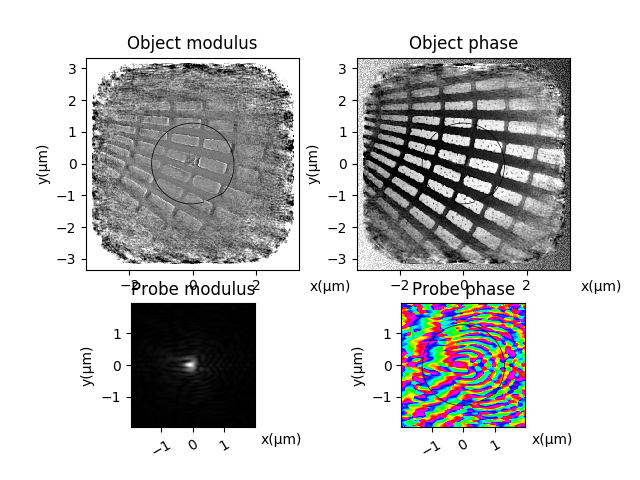

DM/o/3p    #  0 LLK=    52.21(p)   103.09(g)    93.14(e), nb photons=1.942426e+10, dt/cycle=0.000s
DM/o/3p    # 20 LLK=    11.88(p)    24.43(g)    19.48(e), nb photons=1.994446e+10, dt/cycle=0.168s
DM/o/3p    # 40 LLK=    12.71(p)    42.48(g)    20.83(e), nb photons=1.935436e+10, dt/cycle=0.166s
DM/o/3p    # 60 LLK=    15.18(p)    55.11(g)    24.82(e), nb photons=1.906754e+10, dt/cycle=0.166s
DM/o/3p    # 80 LLK=    16.56(p)    35.73(g)    27.00(e), nb photons=1.884369e+10, dt/cycle=0.166s
DM/o/3p    # 99 LLK=    15.28(p)    46.91(g)    25.06(e), nb photons=1.904447e+10, dt/cycle=0.166s
ML/o/3p    #101 LLK=     9.32(p)    59.23(g)    16.60(e), nb photons=2.134726e+10, dt/cycle=0.587s
ML/o/3p    #121 LLK=     5.05(p)    65.55(g)    10.17(e), nb photons=2.216195e+10, dt/cycle=0.297s
ML/o/3p    #141 LLK=     4.44(p)    55.98(g)     9.05(e), nb photons=2.201086e+10, dt/cycle=0.295s
ML/o/3p    #161 LLK=     4.20(p)    51.65(g)     8.70(e), nb photons=2.211320e+10, dt/cycle=0.295s
ML/o/3p   

In [5]:
plt.figure()
p = ShowObjProbe() * DM(update_object=True, update_probe=True, calc_llk=20)**100 * p
p = ShowObjProbe() * ML(update_object=True, update_probe=True, calc_llk=20)**100 * p

## Optimise object, probe and positions
This uses the AP and ML algorithms, whoch are more stable than DM for positions optimisations

Note the final improvement of the object near the center.

<IPython.core.display.Javascript object>


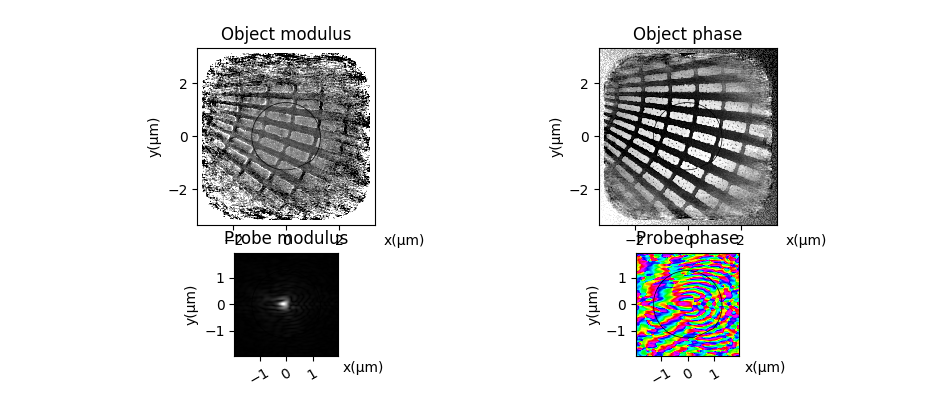

AP/o/3p/t  #201 LLK=     4.10(p)    50.80(g)     8.69(e), nb photons=2.208877e+10, dt/cycle=0.530s
AP/o/3p/t  #221 LLK=     3.37(p)    47.95(g)     6.56(e), nb photons=2.202105e+10, dt/cycle=0.152s
AP/o/3p/t  #241 LLK=     3.14(p)    46.08(g)     6.11(e), nb photons=2.196629e+10, dt/cycle=0.151s
AP/o/3p/t  #261 LLK=     3.03(p)    46.16(g)     5.91(e), nb photons=2.195184e+10, dt/cycle=0.152s
AP/o/3p/t  #281 LLK=     2.96(p)    45.93(g)     5.78(e), nb photons=2.196121e+10, dt/cycle=0.150s
AP/o/3p/t  #301 LLK=     2.94(p)    45.09(g)     5.73(e), nb photons=2.197772e+10, dt/cycle=0.150s
AP/o/3p/t  #321 LLK=     2.89(p)    45.74(g)     5.64(e), nb photons=2.196873e+10, dt/cycle=0.151s
AP/o/3p/t  #341 LLK=     2.89(p)    45.00(g)     5.64(e), nb photons=2.196034e+10, dt/cycle=0.151s
AP/o/3p/t  #361 LLK=     2.86(p)    45.27(g)     5.57(e), nb photons=2.195895e+10, dt/cycle=0.151s
AP/o/3p/t  #381 LLK=     2.85(p)    44.56(g)     5.56(e), nb photons=2.195825e+10, dt/cycle=0.151s
AP/o/3p/t 

In [6]:
plt.figure(figsize=(9.5,4))

p = ShowObjProbe() *AP(update_object=True, update_probe=True, update_pos=True, 
                       pos_history=True, calc_llk=20)**200 * p
p = ShowObjProbe() * ML(update_object=True, update_probe=True, update_pos=True, 
                        pos_history=True, calc_llk=10)**50 * p


## Plot the position shifts
This standard plot is also created when using the `analysis` step in the algorithm with the command-line scripts. 

Shifts are represented both with arrows (scaled if necessary) and a heat map relative to the maximum shift (the color indicates the direction of the shift, the intensity the relative amplitude).

Average distance between points: 0.091918 µm
Shift in positions: mean=0.020235 µm, max=0.157825µm
Scale: 0.5824068917377632


<IPython.core.display.Javascript object>


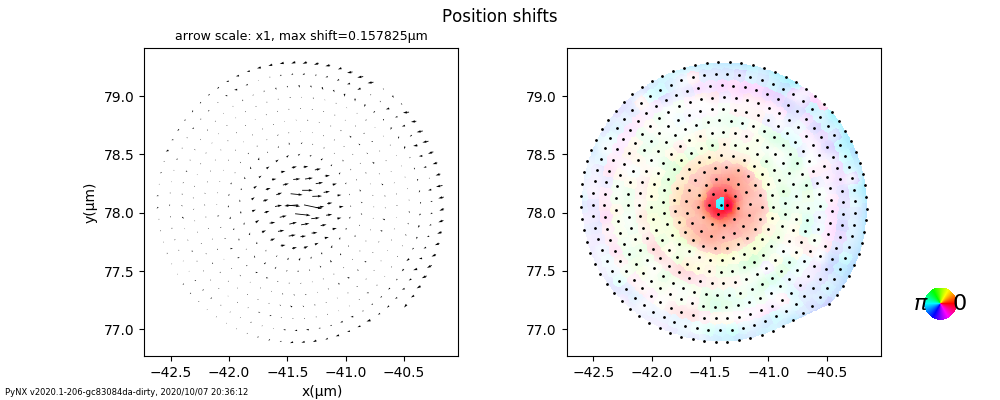

In [7]:
p = PlotPositions(show_plot=True, save_prefix=None, fig_size=(10,4)) * p

## Free GPU memory
It is good practice in a notebook to use `FreePU()` to release memory from the GPU

In [8]:
p = FreePU() * p